In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
_myDateFormat = '%Y-%m-%d'

In [3]:
df = pd.read_csv('data/input/historicEarningsAndPrices.csv')

In [4]:
data_types_dict = {'reportedEPS': float, 'estimatedEPS': float, 'surprise': float, 'surprisePercentage': float,\
                   'dayBeforeEndPrice': float, 'dayAfterEndPrice':float, 'dayBeforeVolume': int,\
                   'dayAfterVolume': int}

In [5]:
df['fiscalDateEnding'] = pd.to_datetime(df['fiscalDateEnding'], format=_myDateFormat)
df['reportedDate'] = pd.to_datetime(df['reportedDate'], format=_myDateFormat)

In [6]:
df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,symbol,dayBeforeEndPrice,dayAfterEndPrice,dayBeforeVolume,dayAfterVolume
0,2022-01-31,2022-02-22,1.21,1.18,0.03,2.5424,A,137.20,133.89,1321937,3848511
1,2021-10-31,2021-11-22,1.21,1.1763,0.0337,2.8649,A,158.79,149.33,935490,1412565
2,2021-07-31,2021-08-17,1.1,0.9946,0.1054,10.5972,A,155.70,173.81,1209255,1185870
3,2021-04-30,2021-05-25,0.97,0.8339,0.1361,16.3209,A,131.15,137.90,775091,1069659
4,2021-01-31,2021-02-16,1.06,0.9006,0.1594,17.6993,A,123.18,122.07,1919710,1902721


In [7]:
df.shape

(305195, 11)

In [8]:
filtered_df = df.loc[(df['reportedDate'] >= '2010-01-01')]
filtered_df = filtered_df.loc[(filtered_df['dayBeforeEndPrice'] >= 0.5)]
filtered_df = filtered_df.loc[(filtered_df['dayBeforeVolume'] >= 1000)]
filtered_df = filtered_df.loc[(filtered_df['dayAfterVolume'] >= 1000)]

filtered_df.reset_index(drop=True, inplace=True)
filtered_df.shape

(166844, 11)

In [9]:
##Creating fake dates for CalMapping
releaseDates = {}
fiscalDates ={}
releaseWeeks = {}
temp_filtered_df = filtered_df.loc[:,:]
temp_filtered_df["tempFiscalDate"] = pd.NaT
temp_filtered_df["tempReleaseDate"] = pd.NaT
temp_filtered_df.head()
temp_filtered_df.reset_index(drop=True, inplace=True)

In [10]:
for index, row in temp_filtered_df.iterrows():
    dateFiscalStr = "2000-"+str(row['fiscalDateEnding'])[-14:-9]
    dateReleaseStr = "2000-"+str(row['reportedDate'])[-14:-9]
    if not dateFiscalStr in fiscalDates.keys():
        fiscalDates[dateFiscalStr] = 1
    else:
        fiscalDates[dateFiscalStr] +=1
        
    if not dateReleaseStr in releaseDates.keys():
        releaseDates[dateReleaseStr] = 1
    else:
        releaseDates[dateReleaseStr] +=1
    temp_filtered_df.iat[index, temp_filtered_df.columns.get_loc('tempFiscalDate')] = dateFiscalStr
    temp_filtered_df.iat[index, temp_filtered_df.columns.get_loc('tempReleaseDate')] = dateReleaseStr
        
temp_filtered_df['tempFiscalDate'] = pd.to_datetime(temp_filtered_df['tempFiscalDate'], format=_myDateFormat)
temp_filtered_df['tempReleaseDate'] = pd.to_datetime(temp_filtered_df['tempReleaseDate'], format=_myDateFormat)


In [11]:
temp_filtered_df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,symbol,dayBeforeEndPrice,dayAfterEndPrice,dayBeforeVolume,dayAfterVolume,tempFiscalDate,tempReleaseDate
0,2022-01-31,2022-02-22,1.21,1.18,0.03,2.5424,A,137.20,133.89,1321937,3848511,2000-01-31,2000-02-22
1,2021-10-31,2021-11-22,1.21,1.1763,0.0337,2.8649,A,158.79,149.33,935490,1412565,2000-10-31,2000-11-22
2,2021-07-31,2021-08-17,1.1,0.9946,0.1054,10.5972,A,155.70,173.81,1209255,1185870,2000-07-31,2000-08-17
3,2021-04-30,2021-05-25,0.97,0.8339,0.1361,16.3209,A,131.15,137.90,775091,1069659,2000-04-30,2000-05-25
4,2021-01-31,2021-02-16,1.06,0.9006,0.1594,17.6993,A,123.18,122.07,1919710,1902721,2000-01-31,2000-02-16


In [12]:
releaseDates

{'2000-02-22': 773,
 '2000-11-22': 120,
 '2000-08-17': 163,
 '2000-05-25': 127,
 '2000-02-16': 607,
 '2000-11-23': 126,
 '2000-08-18': 154,
 '2000-05-21': 164,
 '2000-02-18': 578,
 '2000-11-25': 87,
 '2000-08-14': 679,
 '2000-05-14': 619,
 '2000-02-20': 585,
 '2000-11-19': 197,
 '2000-02-14': 603,
 '2000-11-20': 153,
 '2000-08-15': 228,
 '2000-05-22': 130,
 '2000-11-15': 529,
 '2000-05-16': 216,
 '2000-11-16': 324,
 '2000-05-18': 193,
 '2000-02-17': 608,
 '2000-11-17': 185,
 '2000-02-13': 623,
 '2000-11-14': 723,
 '2000-02-15': 516,
 '2000-05-13': 649,
 '2000-11-12': 1009,
 '2000-08-16': 334,
 '2000-05-17': 286,
 '2000-02-12': 544,
 '2000-01-19': 218,
 '2000-10-14': 110,
 '2000-07-15': 139,
 '2000-04-15': 154,
 '2000-01-20': 236,
 '2000-04-22': 656,
 '2000-01-15': 79,
 '2000-10-16': 245,
 '2000-07-17': 233,
 '2000-04-17': 229,
 '2000-01-16': 100,
 '2000-10-17': 314,
 '2000-07-18': 353,
 '2000-04-18': 316,
 '2000-01-17': 134,
 '2000-10-18': 338,
 '2000-07-19': 385,
 '2000-04-24': 857,
 

In [13]:
fiscalDates

{'2000-01-31': 2001,
 '2000-10-31': 1862,
 '2000-07-31': 1852,
 '2000-04-30': 1850,
 '2000-12-31': 40320,
 '2000-09-30': 38205,
 '2000-06-30': 37576,
 '2000-03-31': 37004,
 '2000-11-30': 1494,
 '2000-08-31': 1531,
 '2000-05-31': 1540,
 '2000-02-28': 1227,
 '2000-02-29': 382}

<AxesSubplot:>

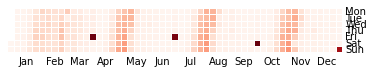

In [14]:
#Release Date Heatmap
import calmap
releaseDatesSeries = pd.Series(releaseDates, name='DateValue')
releaseDatesSeries.index = pd.to_datetime(releaseDatesSeries.index, format = _myDateFormat)
calmap.yearplot(releaseDatesSeries, year=2000)

<AxesSubplot:>

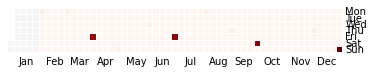

In [15]:
#Fiscal Date Heatmap
fiscalDatesSeries = pd.Series(fiscalDates, name='DateValue2')
fiscalDatesSeries.index = pd.to_datetime(fiscalDatesSeries.index, format = _myDateFormat)
calmap.yearplot(fiscalDatesSeries, year=2000)

In [16]:
##Bands to check:
## Apr 1 - Jun 30
## July1 - Sep 30
## Oct1 - Dec 31
## Jan1 - Mar 31

In [17]:
#Drop all that are released on these dates CAN MAYBE USE THESE IN THE COMING RELEASE THING
#  '2000-09-30': 10776,
#  '2000-06-30': 10220,
#  '2000-03-31': 10640,
#  '2000-12-31': 8832,

In [18]:
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,symbol,dayBeforeEndPrice,dayAfterEndPrice,dayBeforeVolume,dayAfterVolume,tempFiscalDate,tempReleaseDate
0,2022-01-31,2022-02-22,1.21,1.18,0.03,2.5424,A,137.20,133.89,1321937,3848511,2000-01-31,2000-02-22
1,2021-10-31,2021-11-22,1.21,1.1763,0.0337,2.8649,A,158.79,149.33,935490,1412565,2000-10-31,2000-11-22
2,2021-07-31,2021-08-17,1.1,0.9946,0.1054,10.5972,A,155.70,173.81,1209255,1185870,2000-07-31,2000-08-17
3,2021-04-30,2021-05-25,0.97,0.8339,0.1361,16.3209,A,131.15,137.90,775091,1069659,2000-04-30,2000-05-25
4,2021-01-31,2021-02-16,1.06,0.9006,0.1594,17.6993,A,123.18,122.07,1919710,1902721,2000-01-31,2000-02-16


In [19]:
filtered_df.shape

(166844, 13)

In [20]:
##May not need to remove this. Come back to this.
for index, row in filtered_df.iterrows():
    deleteRow = False
    rowMonth = row['reportedDate'].month
    rowDay = row['reportedDate'].day
    badMonthsA = [3,6,9,12]
    badDaysA = [28,29,30,31]
    badMonthsB = [4,7,10,1]
    badDaysB = [1,2,3]
    
    
    if rowMonth in badMonthsA and rowDay in badDaysA:
        deleteRow = True
    if rowMonth in badMonthsB and rowDay in badDaysB:
        deleteRow = True
    if deleteRow:
        filtered_df.iat[index, filtered_df.columns.get_loc('dayBeforeVolume')] = -1
    
    
filtered_df = filtered_df.loc[(filtered_df['dayBeforeVolume'] >= 0)]

filtered_df.reset_index(drop=True, inplace=True)
    

In [21]:
filtered_df.shape

(145791, 13)

In [22]:
releaseDates2 = {}
for index, row in filtered_df.iterrows():
    dateFiscalStr = "2000-"+str(row['fiscalDateEnding'])[-14:-9]
    dateReleaseStr = "2000-"+str(row['reportedDate'])[-14:-9]
        
    if not dateReleaseStr in releaseDates2.keys():
        releaseDates2[dateReleaseStr] = 1
    else:
        releaseDates2[dateReleaseStr] +=1

In [23]:
releaseDates2

{'2000-02-22': 773,
 '2000-11-22': 120,
 '2000-08-17': 163,
 '2000-05-25': 127,
 '2000-02-16': 607,
 '2000-11-23': 126,
 '2000-08-18': 154,
 '2000-05-21': 164,
 '2000-02-18': 578,
 '2000-11-25': 87,
 '2000-08-14': 679,
 '2000-05-14': 619,
 '2000-02-20': 585,
 '2000-11-19': 197,
 '2000-02-14': 603,
 '2000-11-20': 153,
 '2000-08-15': 228,
 '2000-05-22': 130,
 '2000-11-15': 529,
 '2000-05-16': 216,
 '2000-11-16': 324,
 '2000-05-18': 193,
 '2000-02-17': 608,
 '2000-11-17': 185,
 '2000-02-13': 623,
 '2000-11-14': 723,
 '2000-02-15': 516,
 '2000-05-13': 649,
 '2000-11-12': 1009,
 '2000-08-16': 334,
 '2000-05-17': 286,
 '2000-02-12': 544,
 '2000-01-19': 218,
 '2000-10-14': 110,
 '2000-07-15': 139,
 '2000-04-15': 154,
 '2000-01-20': 236,
 '2000-04-22': 656,
 '2000-01-15': 79,
 '2000-10-16': 245,
 '2000-07-17': 233,
 '2000-04-17': 229,
 '2000-01-16': 100,
 '2000-10-17': 314,
 '2000-07-18': 353,
 '2000-04-18': 316,
 '2000-01-17': 134,
 '2000-10-18': 338,
 '2000-07-19': 385,
 '2000-04-24': 857,
 

<AxesSubplot:>

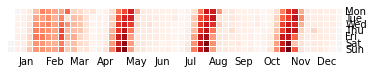

In [24]:
releaseDatesSeries = pd.Series(releaseDates2, name='DateValue')
releaseDatesSeries.index = pd.to_datetime(releaseDatesSeries.index, format = _myDateFormat)
calmap.yearplot(releaseDatesSeries, year=2000)

In [25]:
##q1 = 347-365, 0-94
##q2 = 95-166
##q3 = 167-264
##q4 = 265-346
def dayOfYear(d):
      days = [0,31,28,31,30,31,30,31,31,30,31,30,31]
      if d[0] % 400 == 0:
         days[2]+=1
      elif d[0]%4 == 0 and d[0]%100!=0:
         days[2]+=1
      for i in range(1,len(days)):
         days[i]+=days[i-1]
      return days[d[1]-1]+d[2]

filtered_df['releaseQuarterCode'] = "temp"
filtered_df['releaseYearCode'] = "temp"
filtered_df['releaseFullCode'] = "temp"
filtered_df['percentChange'] = -1
for index, row in filtered_df.iterrows():
        rowMonth = row['reportedDate'].month
        rowDay = row['reportedDate'].day
        rowYear = row['reportedDate'].year
        dayInt = dayOfYear([rowYear, rowMonth, rowDay])
        if  dayInt <= 94 or dayInt >= 347:
            if dayInt >= 347:
                rowYear += 1
            quarter = "1"
        elif dayInt <= 166:
            quarter = "2"
        elif dayInt <= 264:
            quarter = "3"
        else:
            quarter = "4"
        filtered_df.iat[index, filtered_df.columns.get_loc('releaseQuarterCode')] = quarter
        filtered_df.iat[index, filtered_df.columns.get_loc('releaseYearCode')] = str(rowYear)
        filtered_df.iat[index, filtered_df.columns.get_loc('releaseFullCode')] = str(rowYear) + quarter
        ##newvalue - old /old
        filtered_df.iat[index, filtered_df.columns.get_loc('percentChange')] = (row['dayAfterEndPrice']-row['dayBeforeEndPrice'])/row['dayBeforeEndPrice']
filtered_df.head()

C:\Users\Sam\AppData\Local\Temp\ipykernel_8512\719761660.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['releaseQuarterCode'] = "temp"
C:\Users\Sam\AppData\Local\Temp\ipykernel_8512\719761660.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['releaseYearCode'] = "temp"
C:\Users\Sam\AppData\Local\Temp\ipykernel_8512\719761660.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,symbol,dayBeforeEndPrice,dayAfterEndPrice,dayBeforeVolume,dayAfterVolume,tempFiscalDate,tempReleaseDate,releaseQuarterCode,releaseYearCode,releaseFullCode,percentChange
0,2022-01-31,2022-02-22,1.21,1.18,0.03,2.5424,A,137.20,133.89,1321937,3848511,2000-01-31,2000-02-22,1,2022,20221,-0.024125
1,2021-10-31,2021-11-22,1.21,1.1763,0.0337,2.8649,A,158.79,149.33,935490,1412565,2000-10-31,2000-11-22,4,2021,20214,-0.059576
2,2021-07-31,2021-08-17,1.1,0.9946,0.1054,10.5972,A,155.70,173.81,1209255,1185870,2000-07-31,2000-08-17,3,2021,20213,0.116313
3,2021-04-30,2021-05-25,0.97,0.8339,0.1361,16.3209,A,131.15,137.90,775091,1069659,2000-04-30,2000-05-25,2,2021,20212,0.051468
4,2021-01-31,2021-02-16,1.06,0.9006,0.1594,17.6993,A,123.18,122.07,1919710,1902721,2000-01-31,2000-02-16,1,2021,20211,-0.009011


In [26]:
filtered_df.shape

(145791, 17)

In [28]:
# filtered_df.to_csv("data/input/cleanedCorrelationData.csv")

In [29]:
test_df

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,symbol,dayBeforeEndPrice,dayAfterEndPrice,dayBeforeVolume,dayAfterVolume,tempFiscalDate,tempReleaseDate,releaseQuarterCode,releaseYearCode,releaseFullCode,percentChange
0,2022-01-31,2022-02-22,1.21,1.18,0.03,2.5424,A,137.20,133.89,1321937,3848511,2000-01-31,2000-02-22,1,2022,20221,-0.024125
1,2021-10-31,2021-11-22,1.21,1.1763,0.0337,2.8649,A,158.79,149.33,935490,1412565,2000-10-31,2000-11-22,4,2021,20214,-0.059576
2,2021-07-31,2021-08-17,1.1,0.9946,0.1054,10.5972,A,155.70,173.81,1209255,1185870,2000-07-31,2000-08-17,3,2021,20213,0.116313
3,2021-04-30,2021-05-25,0.97,0.8339,0.1361,16.3209,A,131.15,137.90,775091,1069659,2000-04-30,2000-05-25,2,2021,20212,0.051468
4,2021-01-31,2021-02-16,1.06,0.9006,0.1594,17.6993,A,123.18,122.07,1919710,1902721,2000-01-31,2000-02-16,1,2021,20211,-0.009011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65126,2010-12-31,2011-01-18,4.18,4.08,0.1,2.451,IBM,150.00,155.69,4544200,12141000,2000-12-31,2000-01-18,1,2011,20111,0.037933
65127,2010-09-30,2010-10-18,2.82,2.75,0.07,2.5455,IBM,141.06,138.03,7220400,14159100,2000-09-30,2000-10-18,4,2010,20104,-0.021480
65128,2010-06-30,2010-07-19,2.61,2.58,0.03,1.1628,IBM,128.03,126.55,7002900,16337400,2000-06-30,2000-07-19,3,2010,20103,-0.011560
65129,2010-03-31,2010-04-19,1.97,1.93,0.04,2.0725,IBM,130.63,129.69,9546200,15216500,2000-03-31,2000-04-19,2,2010,20102,-0.007196


In [30]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy.stats as stats

# df = pd.read_csv('synchrony_sample.csv')
# overall_pearson_r = df.corr().iloc[0,1]
# print(f"Pandas computed Pearson r: {overall_pearson_r}")
# # out: Pandas computed Pearson r: 0.2058774513561943

# r, p = stats.pearsonr(df.dropna()['S1_Joy'], df.dropna()['S2_Joy'])
# print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# # out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

# # Compute rolling window synchrony
# f,ax=plt.subplots(figsize=(7,3))
# df.rolling(window=30,center=True).median().plot(ax=ax)
# ax.set(xlabel='Time',ylabel='Pearson r')
# ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

In [ ]:
# Pearson Correlation (Time Lagged Cross Correlation next)?
# max of the minimums of the 2 codes
import scipy.stats as stats
import json
from datetime import datetime



test_df = filtered_df
dfVariableMain = test_df[['symbol','releaseFullCode', 'percentChange']]
uniqueSymbolListMain = list(dfVariableMain.symbol.unique())
uniqueSymbolListB = list(dfVariableMain.symbol.unique())
correlationResults = {}
correlationCompletions= {}
sigCor = {}
count = 0

for symbolMain in uniqueSymbolListMain:
    correlationResults[symbolMain] = {}
    correlationCompletions[symbolMain] = []
    sigCor[symbolMain] = []
for symbolMain in uniqueSymbolListMain:
    count += 1
    errorCount = 0
    successCount = 0
    print("----------Currently on---------")
    print(symbolMain)
    print("----------Since---------")
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time)
    print("-----Success/Failures/Rate-----")
    count500 = str(int(count/500))
    for symbolB in uniqueSymbolListB:
        try:
            if symbolMain == symbolB:
                correlationResults[symbolMain][symbolB] = {"r": 1, "p": 1}
            elif symbolMain in correlationCompletions[symbolB]:
                correlationResults[symbolMain][symbolB] = correlationResults[symbolB][symbolMain]
            else:
                dfTemp = dfVariableMain[dfVariableMain['symbol'].isin([symbolMain, symbolB])]
                dfTempMain = dfTemp[dfTemp['symbol']==symbolMain]
                dfTempB = dfTemp[dfTemp['symbol']==symbolB]
                mainMinCode = int(dfTempMain[dfTempMain['symbol'] == symbolMain]["releaseFullCode"].min())
                bMinCode = int(dfTempB[dfTempB['symbol'] == symbolB]["releaseFullCode"].min())
                earliestMutualDate = str(max(mainMinCode,bMinCode) + 20)
                dfTempMain = dfTempMain[dfTempMain['releaseFullCode'] >= earliestMutualDate]
                dfTempB = dfTempB[dfTempB['releaseFullCode'] >= earliestMutualDate]
                dfTempMain.reset_index(drop=True, inplace=True)
                dfTempB.reset_index(drop=True, inplace=True)
                dfTempFinal = pd.DataFrame()
                dfTempFinal["main"] = dfTempMain["percentChange"]
                dfTempFinal["codes"] = dfTempMain["releaseFullCode"]
                dfTempFinal["B"] = dfTempB["percentChange"]
                r, p = stats.pearsonr(dfTempFinal['main'], dfTempFinal['B'])
                correlationResults[symbolMain][symbolB] = {"r": r, "p": p}
                correlationCompletions[symbolMain].append(symbolB)
                successCount += 1
                if p <= 0.001:
                    print("$$$$$ significant finding: "+symbolMain + " & " + symbolB+" $$$$$$$$$$")
                    sigCor[symbolMain].append(symbolB)
                    with open("data/output/correlations/special/special.json", "w") as outfile:
                        json.dump(sigCor, outfile)
            
        except Exception as e:
            errorCount+=1
            correlationResults[symbolMain][symbolB] = {"r": "F", "p": "F"}
            correlationCompletions[symbolMain].append(symbolB)
    with open("data/output/correlations/"+symbolMain + ".json", "w") as outfile:
        json.dump(correlationResults[symbolMain], outfile)
    with open("data/output/correlations/main"+count500+".json", "w") as outfile:
        json.dump(correlationResults, outfile)
    print("Succ: "+ str(successCount) +" / Fail: " + str(errorCount) + " / SRate: " + str(round(successCount/(successCount+errorCount), 2)))
    print("---------------------------------")

----------Currently on---------
A
----------Since---------
19:27:36
-----Success/Failures/Rate-----
$$$$$ significant finding: A & OOMA $$$$$$$$$$
$$$$$ significant finding: A & PNR $$$$$$$$$$
$$$$$ significant finding: A & TPC $$$$$$$$$$
Succ: 2780 / Fail: 2459 / SRate: 0.53
---------------------------------
----------Currently on---------
AA
----------Since---------
19:28:00
-----Success/Failures/Rate-----
$$$$$ significant finding: AA & ECOL $$$$$$$$$$
Succ: 3039 / Fail: 2199 / SRate: 0.58
---------------------------------
----------Currently on---------
AACG
----------Since---------
19:28:24
-----Success/Failures/Rate-----
$$$$$ significant finding: AACG & PCG $$$$$$$$$$
Succ: 3843 / Fail: 1394 / SRate: 0.73
---------------------------------
----------Currently on---------
AADI
----------Since---------
19:28:50
-----Success/Failures/Rate-----
$$$$$ significant finding: AADI & CRUS $$$$$$$$$$
$$$$$ significant finding: AADI & EQC $$$$$$$$$$
$$$$$ significant finding: AADI & FDP $$$$

$$$$$ significant finding: ABEV & BUD $$$$$$$$$$
$$$$$ significant finding: ABEV & DRI $$$$$$$$$$
$$$$$ significant finding: ABEV & HE $$$$$$$$$$
$$$$$ significant finding: ABEV & MMP $$$$$$$$$$
$$$$$ significant finding: ABEV & RELL $$$$$$$$$$
$$$$$ significant finding: ABEV & ROL $$$$$$$$$$
$$$$$ significant finding: ABEV & ZG $$$$$$$$$$
Succ: 2764 / Fail: 2451 / SRate: 0.53
---------------------------------
----------Currently on---------
ABG
----------Since---------
19:37:54
-----Success/Failures/Rate-----
$$$$$ significant finding: ABG & BCSF $$$$$$$$$$
$$$$$ significant finding: ABG & HLIO $$$$$$$$$$
$$$$$ significant finding: ABG & LAWS $$$$$$$$$$
Succ: 2763 / Fail: 2451 / SRate: 0.53
---------------------------------
----------Currently on---------
ABIO
----------Since---------
19:38:19
-----Success/Failures/Rate-----
$$$$$ significant finding: ABIO & CDR $$$$$$$$$$
$$$$$ significant finding: ABIO & CEMI $$$$$$$$$$
$$$$$ significant finding: ABIO & CZNC $$$$$$$$$$
$$$$$ signifi

$$$$$ significant finding: ACB & WELL $$$$$$$$$$
$$$$$ significant finding: ACB & WRK $$$$$$$$$$
$$$$$ significant finding: ACB & WVE $$$$$$$$$$
Succ: 2875 / Fail: 2323 / SRate: 0.55
---------------------------------
----------Currently on---------
ACC
----------Since---------
19:45:02
-----Success/Failures/Rate-----
$$$$$ significant finding: ACC & ELS $$$$$$$$$$
$$$$$ significant finding: ACC & FISI $$$$$$$$$$
$$$$$ significant finding: ACC & FR $$$$$$$$$$
$$$$$ significant finding: ACC & GOOD $$$$$$$$$$
$$$$$ significant finding: ACC & HAFC $$$$$$$$$$
$$$$$ significant finding: ACC & LRFC $$$$$$$$$$
$$$$$ significant finding: ACC & MGNX $$$$$$$$$$
$$$$$ significant finding: ACC & NVAX $$$$$$$$$$
$$$$$ significant finding: ACC & PTGX $$$$$$$$$$
$$$$$ significant finding: ACC & SM $$$$$$$$$$
$$$$$ significant finding: ACC & SNES $$$$$$$$$$
$$$$$ significant finding: ACC & TPVG $$$$$$$$$$
$$$$$ significant finding: ACC & TWLO $$$$$$$$$$
$$$$$ significant finding: ACC & WY $$$$$$$$$$
Su

In [103]:
correlationResults

{'A': {'A': {'r': 1, 'p': 1},
  'AAPL': {'r': -0.06074814224794517, 'p': 0.7059525929697852},
  'IBM': {'r': -0.17908634410262417, 'p': 0.26257047542454565}},
 'AAPL': {'A': {'r': -0.06074814224794517, 'p': 0.7059525929697852},
  'AAPL': {'r': 1, 'p': 1},
  'IBM': {'r': 0.20971135821681028, 'p': 0.18818408974365347}},
 'IBM': {'A': {'r': -0.17908634410262417, 'p': 0.26257047542454565},
  'AAPL': {'r': 0.20971135821681028, 'p': 0.18818408974365347},
  'IBM': {'r': 1, 'p': 1}}}

In [79]:
correlationCompletions

{'A': ['AAPL', 'IBM'], 'AAPL': ['IBM'], 'IBM': []}

In [81]:
##testing failures/setup

symbolMain = "IBM"
symbolB = "A"
dfTemp = dfVariableMain[dfVariableMain['symbol'].isin([symbolMain, symbolB])]

dfTempMain = dfTemp[dfTemp['symbol']==symbolMain]
dfTempB = dfTemp[dfTemp['symbol']==symbolB]
mainMinCode = int(dfTempMain[dfTempMain['symbol'] == symbolMain]["releaseFullCode"].min())
bMinCode = int(dfTempB[dfTempB['symbol'] == symbolB]["releaseFullCode"].min())
earliestMutualDate = str(max(mainMinCode,bMinCode) + 20)
dfTempMain = dfTempMain[dfTempMain['releaseFullCode'] >= earliestMutualDate]
dfTempB = dfTempB[dfTempB['releaseFullCode'] >= earliestMutualDate]
dfTempMain.reset_index(drop=True, inplace=True)
dfTempB.reset_index(drop=True, inplace=True)
dfTempFinal = pd.DataFrame()
dfTempFinal["main"] = dfTempMain["percentChange"]
dfTempFinal["codes"] = dfTempMain["releaseFullCode"]
dfTempFinal["B"] = dfTempB["percentChange"]
r, p = stats.pearsonr(dfTempFinal['main'], dfTempFinal['B'])



print(r)
print(p)
dfTempFinal

-0.17908634410262417
0.26257047542454565


,main,codes,B
0,0.052184,20221,-0.024125
1,-0.096140,20214,-0.059576
2,0.007703,20213,0.116313
3,0.034209,20212,0.051468
4,-0.088177,20211,-0.009011
5,-0.067974,20204,0.052175
6,0.007593,20203,0.021681
7,-0.027972,20202,0.106312
8,0.040344,20201,-0.073344
9,-0.061119,20194,0.071001


In [70]:
dfTempMain

,symbol,releaseFullCode,percentChange
98,IBM,20221,0.052184
99,IBM,20214,-0.096140
100,IBM,20213,0.007703
101,IBM,20212,0.034209
102,IBM,20211,-0.088177
103,IBM,20204,-0.067974
104,IBM,20203,0.007593
105,IBM,20202,-0.027972
106,IBM,20201,0.040344
107,IBM,20194,-0.061119


In [71]:
dfTempB

,symbol,releaseFullCode,percentChange
0,A,20221,-0.024125
1,A,20214,-0.059576
2,A,20213,0.116313
3,A,20212,0.051468
4,A,20211,-0.009011
5,A,20204,0.052175
6,A,20203,0.021681
7,A,20202,0.106312
8,A,20201,-0.073344
9,A,20194,0.071001


In [95]:

499
500
501
1001

1001

In [100]:
int(999/500)

1